In [259]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load the Titanic dataset and display its first few rows to understand its structure.

In [262]:
# Load the dataset
data = pd.read_csv('task2.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
display(data.head())

Dataset Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Use data.isnull().sum() to show the number of missing values in each column.

In [265]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### step 3: Handle missing values

In [175]:
# Fill missing 'Age' values with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing 'Embarked' values with the most frequent value (mode)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop the 'Cabin' column due to a high number of missing values
data_cleaned = data.drop(columns=['Cabin'])

### Step 4: check for any other missing values

In [178]:
# Check if there are any missing values remaining
missing_values_summary = data_cleaned.isnull().sum()
print(missing_values_summary)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### step 5: Convert categorical variables to numeric values (if needed for analysis)

In [181]:
# Convert 'Sex' column to numeric (Male=0, Female=1)
data_cleaned['Sex'] = data_cleaned['Sex'].map({'male': 0, 'female': 1})

### Step 6: Exploratory Data Analysis (EDA)

In [184]:
# 6.1 Descriptive Statistics
print("Descriptive Statistics:")
display(data.describe(include='all'))

Descriptive Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [186]:
# 6.2 Survival Rate
survival_rate = data_cleaned['Survived'].mean()
print(f"Survival Rate: {survival_rate * 100:.2f}%")


Survival Rate: 38.38%


## Conclusion:The overall survival rate was about 38%.

In [234]:
# 6.3 Survival Rate by Gender
survival_by_gender = data_cleaned.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(survival_by_gender)

Survival Rate by Gender:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


In [236]:
# 6.4 Survival Rate by Pclass (Ticket Class)
survival_by_class = data_cleaned.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Ticket Class:")
print(survival_by_class)

Survival Rate by Ticket Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [238]:
# 5.5 Survival Rate by Embarked (Port of Embarkation)
survival_by_embarked = data_cleaned.groupby('Embarked')['Survived'].mean()
print("Survival Rate by Embarked Port:")
print(survival_by_embarked)

Survival Rate by Embarked Port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


## 6.6 Visualizations

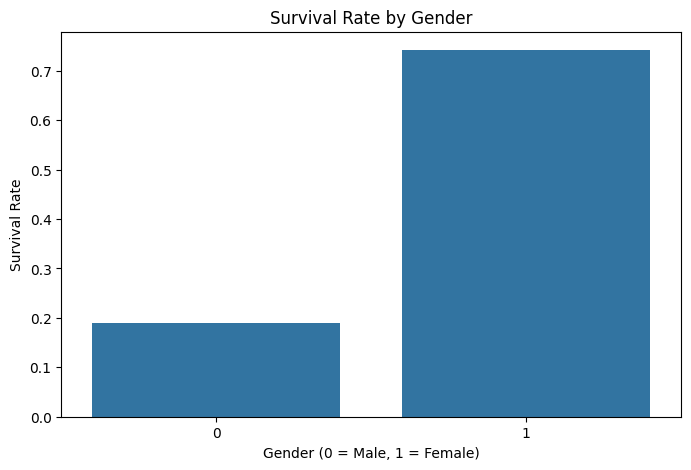

In [241]:
# Plotting survival rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

## Conclusion: Female passengers had a much higher survival rate compared to male passengers.

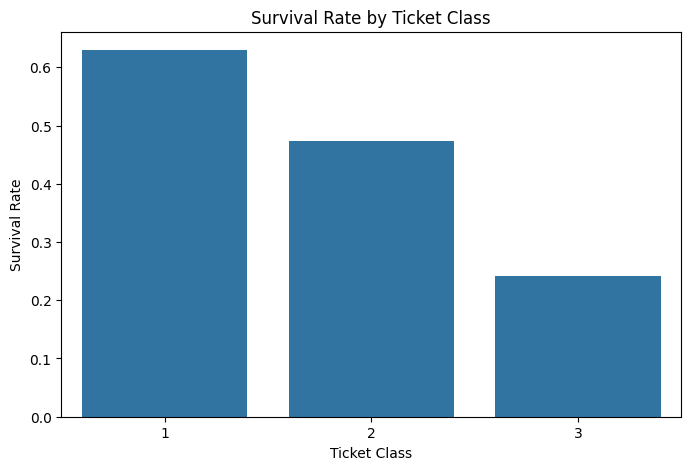

In [243]:
# Plotting survival rate by ticket class
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.show()

## Conclusion: First-class passengers had the highest survival rates, followed by second and third-class passengers.

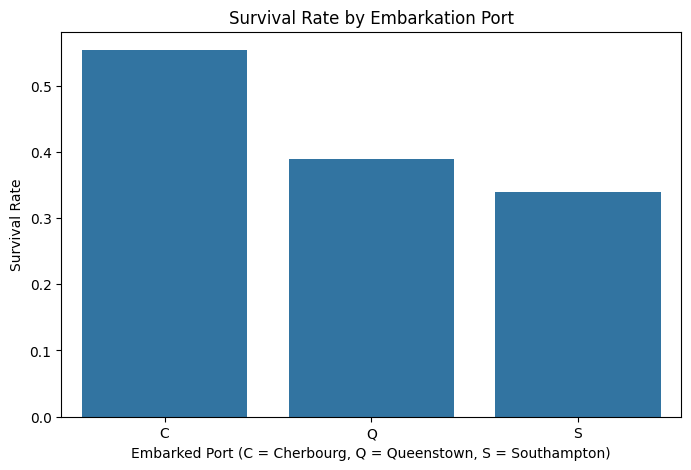

In [245]:
# Plotting survival rate by embarkation port
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarked Port (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Survival Rate')
plt.show()

 ## Conclusion: Passengers who embarked from Cherbourg had the highest survival rates, while Southampton passengers had the lowest.

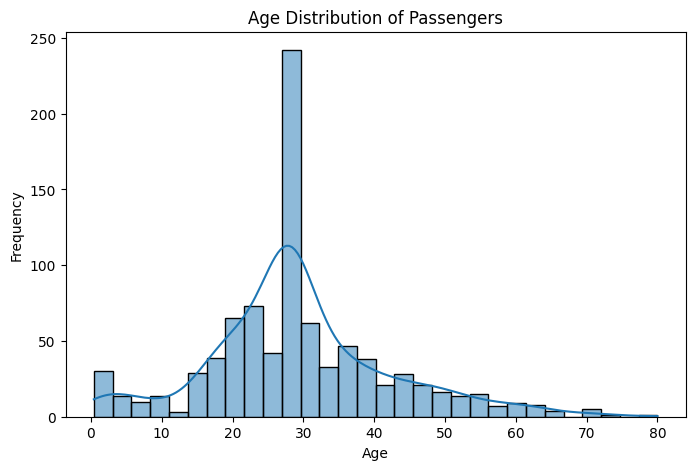

In [209]:
# Age Distribution of Passengers
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['Age'], kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Conclusion: The majority of passengers were between 20-40 years old, with lower survival rates for older passengers.

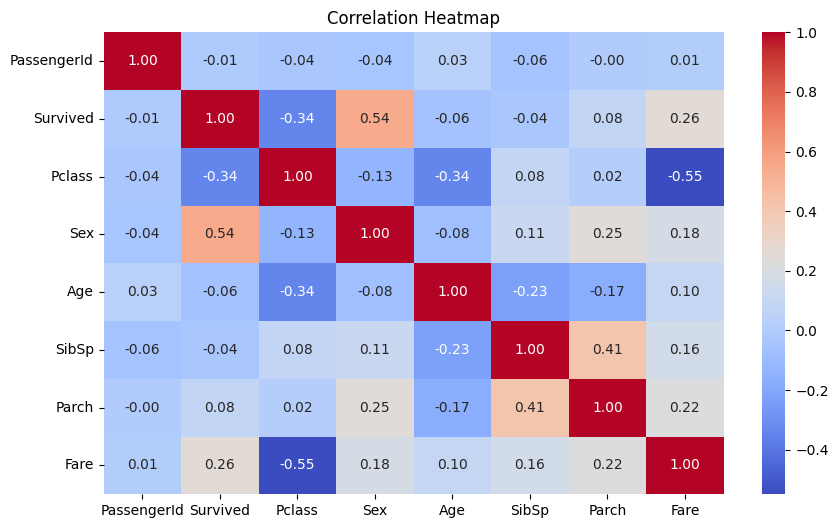

In [49]:
# Step 2.8 Correlation Heatmap (fixing the issue)
# Select only numeric columns for correlation
numeric_columns = data_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Conclusion: There is a clear correlation between ticket class and survival: higher class (first class) passengers had higher survival rates.
